# `torch.optim`: All the common gradient-based optimizers

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

## Define a function to minimize

This is called a _cost_ function, a _loss_ function, or an _objective_ function, among other names.

In [2]:
def f(x):
    return x**2

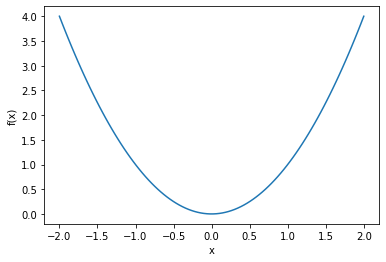

In [3]:
xvec = np.linspace(-2, 2, 100)
fvec = f(xvec)
plt.plot(xvec, fvec)
plt.xlabel('x')
plt.ylabel('f(x)');

## Set up a stochastic gradient descent (SGD) optimizer and run it

The input `x` need gradients, because the optimizer needs to compute the derivative:
$$
\nabla_x f(x) = \frac{\partial f}{\partial x}(x)
$$

The basic algorithm of a gradient optimizer is to repeat:
$$
x \gets x - \alpha \nabla_x f(x)
$$

The parameter $\alpha$ is called the _learning rate_.

In [4]:
x = torch.tensor([2.0], requires_grad=True)

In [5]:
opt = torch.optim.SGD([x], lr=0.1)

As the optimizer runs, observe the gradient steps:

In [6]:
x_history = [x.detach().numpy().copy()]
for i in range(10):
    print(f'##########')
    print(f'i = {i}')
    print(f'initial x = {x}')
    opt.zero_grad()
    z = f(x)
    print(f'z = {z}')
    z.backward()
    print(f'x.grad = {x.grad}')
    opt.step()
    print(f'updated x = {x}')
    x_history.append(x.detach().numpy().copy())

##########
i = 0
initial x = tensor([2.], requires_grad=True)
z = tensor([4.], grad_fn=<PowBackward0>)
x.grad = tensor([4.])
updated x = tensor([1.6000], requires_grad=True)
##########
i = 1
initial x = tensor([1.6000], requires_grad=True)
z = tensor([2.5600], grad_fn=<PowBackward0>)
x.grad = tensor([3.2000])
updated x = tensor([1.2800], requires_grad=True)
##########
i = 2
initial x = tensor([1.2800], requires_grad=True)
z = tensor([1.6384], grad_fn=<PowBackward0>)
x.grad = tensor([2.5600])
updated x = tensor([1.0240], requires_grad=True)
##########
i = 3
initial x = tensor([1.0240], requires_grad=True)
z = tensor([1.0486], grad_fn=<PowBackward0>)
x.grad = tensor([2.0480])
updated x = tensor([0.8192], requires_grad=True)
##########
i = 4
initial x = tensor([0.8192], requires_grad=True)
z = tensor([0.6711], grad_fn=<PowBackward0>)
x.grad = tensor([1.6384])
updated x = tensor([0.6554], requires_grad=True)
##########
i = 5
initial x = tensor([0.6554], requires_grad=True)
z = tensor([0.42

## Visualizing optimization history

Plot the history of `x` versus step number:

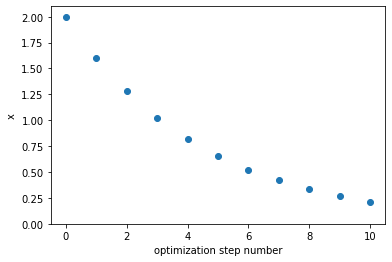

In [7]:
plt.plot(x_history, 'o')
plt.ylim(0, 2.1)
plt.xlabel('optimization step number')
plt.ylabel('x');

Plot the history of `x` values together with the cost function:

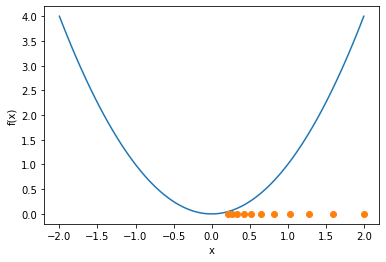

In [8]:
xvec = np.linspace(-2, 2, 100)
fvec = f(xvec)
plt.plot(xvec, fvec)
plt.plot(x_history, np.zeros(len(x_history)), 'o')
plt.xlabel('x')
plt.ylabel('f(x)');

## Tasks

Observe that the rate of change of `x` slows down as the optimization proceeds. Why does this happen?

To fix this problem, more advanced gradient methods use momentum, Nesterov acceleration, or second-order derivative information (e.g., the [L-BFGS method](https://en.wikipedia.org/wiki/Limited-memory_BFGS)).

1. Read about momentum and related ideas in [An overview of gradient descent optimization algorithms](https://arxiv.org/abs/1609.04747) by Sebastian Ruder

2. Use the Adam optimizer from PyTorch to optimize the function above. What differences do you observe?

In [9]:
opt = torch.optim.Adam([x], lr=0.1)

In [10]:
x_history = [x.detach().numpy().copy()]
for i in range(10):
    print(f'##########')
    print(f'i = {i}')
    print(f'initial x = {x}')
    opt.zero_grad()
    z = f(x)
    print(f'z = {z}')
    z.backward()
    print(f'x.grad = {x.grad}')
    opt.step()
    print(f'updated x = {x}')
    x_history.append(x.detach().numpy().copy())

##########
i = 0
initial x = tensor([0.2147], requires_grad=True)
z = tensor([0.0461], grad_fn=<PowBackward0>)
x.grad = tensor([0.4295])
updated x = tensor([0.1147], requires_grad=True)
##########
i = 1
initial x = tensor([0.1147], requires_grad=True)
z = tensor([0.0132], grad_fn=<PowBackward0>)
x.grad = tensor([0.2295])
updated x = tensor([0.0206], requires_grad=True)
##########
i = 2
initial x = tensor([0.0206], requires_grad=True)
z = tensor([0.0004], grad_fn=<PowBackward0>)
x.grad = tensor([0.0411])
updated x = tensor([-0.0573], requires_grad=True)
##########
i = 3
initial x = tensor([-0.0573], requires_grad=True)
z = tensor([0.0033], grad_fn=<PowBackward0>)
x.grad = tensor([-0.1147])
updated x = tensor([-0.1062], requires_grad=True)
##########
i = 4
initial x = tensor([-0.1062], requires_grad=True)
z = tensor([0.0113], grad_fn=<PowBackward0>)
x.grad = tensor([-0.2124])
updated x = tensor([-0.1229], requires_grad=True)
##########
i = 5
initial x = tensor([-0.1229], requires_grad=Tr

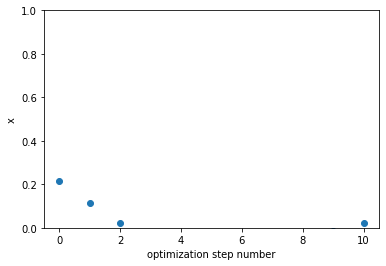

In [12]:
plt.plot(x_history, 'o')
plt.ylim(0, 1.0)
plt.xlabel('optimization step number')
plt.ylabel('x');

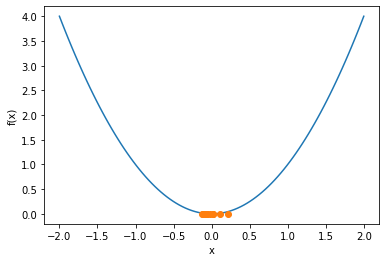

In [13]:
xvec = np.linspace(-2, 2, 100)
fvec = f(xvec)
plt.plot(xvec, fvec)
plt.plot(x_history, np.zeros(len(x_history)), 'o')
plt.xlabel('x')
plt.ylabel('f(x)');

Observation: With Adam optimizer it trains much faster!